In [1]:
from mpl_toolkits.basemap import Basemap
import netCDF4
from pylab import *
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from datetime import datetime
import math as math
%matplotlib inline

In [2]:
url='http://colossus.dl.stevens-tech.edu/thredds/dodsC/latest/Complete_gcmplt.nc'
nc=netCDF4.Dataset(url)
var_name='elev'
print 'Available variables are: ' +  str(nc.variables.keys())
tstr='NYHOPS Example'

Available variables are: [u'xpos', u'ypos', u'time', u'date', u'layer_bnds', u'sigma', u'lon_bnds', u'lat_bnds', u'x', u'y', u'lon', u'lat', u'h1', u'h2', u'depth', u'ang', u'FSM', u'DUM', u'DVM', u'elev', u'wu', u'wv', u'patm', u'airt', u'cld', u'rhum', u'swobs', u'wh', u'wp', u'wd', u'u', u'v', u'salt', u'temp']


In [3]:
lon=nc.variables['lon']
lond=lon[:]
lond = ma.array(lond,mask=lond<-180)
print np.nanmin(lond), np.max(lond)

lat=nc.variables['lat']
latd=lat[:]
latd = ma.array(latd,mask=latd<-90)
print np.nanmin(latd), np.max(latd)

latmn = np.mean(latd)
lo,la =np.meshgrid(lond,latd)


-75.5756 -69.8293
37.6989 42.7488


In [4]:
tidx=12
time=nc.variables['time']
dtime = netCDF4.num2date(time[tidx],time.units)
datestr = dtime.strftime('%Y-%b-%d %H:%M')
print datestr

2015-Apr-20 06:05


In [5]:
var=nc.variables[var_name]
var_d=var[tidx,:,:]
#var_d = ma.array(var_d,mask=var_d==var.FillValue_)
vmin=np.nanmin(var_d)
vmax=np.nanmax(var_d)

# This min/max calc won't work in general, but is OK for data relatively well distributed about 0
#vminmax=math.ceil(2*max(abs(vmin),abs(vmax)))/2
vminmax=5
print vmin,vmax,vminmax

-5.00046 1.76248 5


/opt/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/opt/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


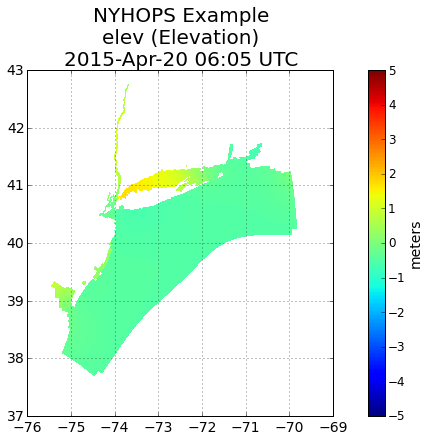

In [6]:
fig = plt.figure(figsize=(12,6), dpi=144)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_aspect(1.0/np.cos(latmn * np.pi / 180.0))

pc=pcolor(lond, latd, var_d, cmap=plt.cm.jet, vmin=-vminmax, vmax=vminmax)

plt.title("%s\n%s (%s)\n%s UTC" % (tstr, var_name, var.long_name, datestr), fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=14)

cbax = fig.add_axes()  #([0.95, 0.1, 0.05, 0.8])
cb = plt.colorbar(pc, cax=cbax,  orientation='vertical')
cb.set_label(var.units, fontsize=14)
cb.ax.tick_params(axis='both', which='major', labelsize=12)

In [7]:
fig = plt.figure(figsize=(24,12), dpi=144)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#m = Basemap(projection='kav7',lon_0=-80,resolution='l')

m = Basemap(llcrnrlon=llcrnrlon,
            llcrnrlat=llcrnrlat,
            urcrnrlon=urcrnrlon,
            urcrnrlat=urcrnrlat,
            projection='lcc',
            resolution ='i',
            area_thresh=1000.,
            lat_1=lat_1,
            lon_0=lon_0)
 
m.drawmapboundary(fill_color='0.8')
m.drawcoastlines(linewidth=1.)
#m.fillcontinents(color='0.8')
m.drawparallels(np.arange(36,46,1),labels=[1,0,0,0],fontsize=12)
m.drawmeridians(np.arange(-80,-60,1),labels=[0,0,0,1],fontsize=12)

pc=m.pcolor(lond, latd, var_d, cmap=plt.cm.jet, vmin=-vminmax, vmax=vminmax, latlon=True)

cb = m.colorbar(pc,"right", size="5%", pad="10%")
cb.set_label(var.units, fontsize=24)
cb.ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_title("%s\n%s (%s)\n%s UTC" % (tstr, var_name, var.long_name, datestr), fontsize=20)